# <h1>Tasks completed</h1>
<h2>Key tasks</h2>
<ol>
    <li>Explore scikit learn</li>
    <li>Loading and preprocessing data including label encoding from categorical to numerical and standardization-- using pandas and read_csv, LabelEncoder, and StandardScaler.</li>
    <li>Set up of data matrix and target attribute vector by data frame column drop and dataframe slicing, respectively.</li>
    <li>Splitting of data into training and test sets....70% training data, 30% test data using train_test_split.</li>
    <li>Training 5 classification models based on Decision Trees(1), Random Forest(1), Naive Bayes(1), and k-Nearest Neighbor(2)(k=3, and k=5)--from various sklearn modules.</li>
    <li>Performance evaluation using classification_report and confusion_matrix (from metrics module).</li>
    <li>Plotting of confusion matrix as a graph.</li>
    <li>Computation of accuracy for each model using accuracy_score and plotting accuracy scores on a bar chart to graphically compare different models.</li>
    <li>Prediction/classification of an unseen instance.</li>
</ol>
<h2>Miscellaneous tasks</h2>
<ol start=9>
    <li>Loading and examining sklearn datasets (california housing, iris, diabetes) from the datasets module. Try to load ther other sklearn datasets and examine them. If you like, you can fit models for one or two of them.</li>
</ol>


# <h2>Explore Scikit Learn</h2>
<ul>
    <li>Built on top of matplotlib, SciPy, and NumPy.</li>
    <li>A library for machine learning tasks such as:</li>
        <ul>
          <li>classification</li>
          <li>regression</li>
          <li>clustering</li>
          <li>dimensionality reduction</li>
          <li>model selection</li>
          <li>preprocessing</li>
        </ul>
      <li>Key tasks include training model (model fitting), model evaluation, and prediction (of unseen instances)</li>
</ul>

<p>Explore the library: <a href="https://scikit-learn.org/stable/"> Scikit Learn</a></p>
<p>Having a taste of scikit learn through a quick tutorial: <a href="https://scikit-learn.org/stable/getting_started.html"> Get Started with Scikit Learn</a></p>


# Import libraries

In [1]:
#for data loading, assembly, manipulation, and exploration.
import pandas as pd
import numpy as np

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for model fitting
from sklearn import tree #Decision tree--eager learner
from sklearn.neighbors import KNeighborsClassifier #lazy learner
from sklearn.naive_bayes import GaussianNB #probabilistic
from sklearn.ensemble import RandomForestClassifier #ensemble model

#for preprocessing e.g. data transformation
from sklearn.preprocessing import StandardScaler, LabelEncoder #preprocessing

#for model selection
from sklearn.model_selection import train_test_split #training and testing

#generating metrics for model evaluation
from sklearn.metrics import confusion_matrix, classification_report #evaluation 
from sklearn.metrics import accuracy_score

#for dimensionality reduction
from sklearn.decomposition import PCA

#for sklearn datasets
from sklearn import datasets

from sklearn.datasets import fetch_california_housing


import warnings
warnings.filterwarnings("ignore")

# Toy Datasets (available with sklearn)

# Load and examine the California Housing dataset.

In [2]:
housing = fetch_california_housing()

In [3]:
housing.data.shape

(20640, 8)

In [8]:
housing.target.shape

(20640,)

In [9]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [10]:
df_housing= pd.DataFrame(housing.data, columns=housing.feature_names)

In [11]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [12]:
df_housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [13]:
df_housing['TARGET']=housing.target

In [14]:
df_housing.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [15]:
df_housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [16]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   TARGET      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


# Load and explore the Iris dataset

In [17]:
iris=datasets.load_iris()

In [18]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [19]:
df_iris= pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['target']=iris.target

In [20]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [21]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# Load the diabates dataset

In [22]:
diabetes=datasets.load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [23]:
df_diabetes= pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_diabetes['target']=diabetes.target

In [24]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [25]:
df_diabetes.shape

(442, 11)

# Classification: Model Building and Evaluation 
<p>Load breast cancer dataset--build predictive models and compare various ML algorithms</p>
<p> Algorithms considered: kNN, naive Bayes, Random Forest, Decision tree</p>

In [28]:
#load the dataset
bcdata=pd.read_csv('breast_cancer.csv')

# Examine and perform preprocessing e.g. drop unnecessary attributes

In [29]:
bcdata.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [30]:
bcdata.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [31]:
bcdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [32]:
#Clearly the ID is just a record identifier. Not informative. Drop
len(bcdata['id'].unique())

569

In [33]:
if 'id' in bcdata.columns:
    bcdata.drop(labels=['id'], axis=1, inplace=True) # drops the id column

In [34]:
#Now- 32 columns
bcdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [35]:
#Column has only null values---not informative. drop
if 'Unnamed: 32' in bcdata.columns: 
    bcdata.drop(labels=['Unnamed: 32'], axis=1, inplace=True)

In [36]:
#Only 31 columns now
bcdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

# One column contains categorical data. Check and transform

In [37]:
bcdata['diagnosis'].sample(6) #this is data exploration

545    B
444    M
451    M
102    B
48     B
475    B
Name: diagnosis, dtype: object

In [40]:
bcdata['diagnosis'].unique() #returns the possible values that the attribute can assume--more data exploration.

array(['M', 'B'], dtype=object)

In [41]:
bcdata['diagnosis'].value_counts() #do you think there is class imbalance? If yes, how could you address this? More data exploration.

B    357
M    212
Name: diagnosis, dtype: int64

In [42]:
#Transform label for diagnosis to numerical----this is preprocessing
#Create a label encoder object
diagnosis_label=LabelEncoder()
diagnosis_label

LabelEncoder()

In [43]:
bcdata['diagnosis']=diagnosis_label.fit_transform(bcdata['diagnosis']) #can this be achieved with mapping related functions?

In [44]:
diagnosis_label.classes_ #see the new values

array(['B', 'M'], dtype=object)

In [45]:
bcdata['diagnosis'].sample(10)

106    0
97     0
47     1
205    1
538    0
433    1
492    1
183    0
353    1
191    0
Name: diagnosis, dtype: int32

In [46]:
bcdata['diagnosis'].unique()

array([1, 0])

In [47]:
#See results B-0, M-1....data exploration
bcdata['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [48]:
bcdata.sample(6) #examine a sample from the dataset

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
150,0,13.00,20.78,83.51,519.4,0.11350,0.07589,0.03136,0.02645,0.2540,...,14.16,24.11,90.82,616.7,0.1297,0.1105,0.08112,0.06296,0.3196,0.06435
372,1,21.37,15.10,141.30,1386.0,0.10010,0.15150,0.19320,0.12550,0.1973,...,22.69,21.84,152.10,1535.0,0.1192,0.2840,0.40240,0.19660,0.2730,0.08666
196,1,13.77,22.29,90.63,588.9,0.12000,0.12670,0.13850,0.06526,0.1834,...,16.39,34.01,111.60,806.9,0.1737,0.3122,0.38090,0.16730,0.3080,0.09333
295,0,13.77,13.27,88.06,582.7,0.09198,0.06221,0.01063,0.01917,0.1592,...,14.67,16.93,94.17,661.1,0.1170,0.1072,0.03732,0.05802,0.2823,0.06794
23,1,21.16,23.04,137.20,1404.0,0.09428,0.10220,0.10970,0.08632,0.1769,...,29.17,35.59,188.00,2615.0,0.1401,0.2600,0.31550,0.20090,0.2822,0.07526
292,0,12.95,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,0.1730,...,13.74,19.93,88.81,585.4,0.1483,0.2068,0.22410,0.10560,0.3380,0.09584


In [49]:
benign=bcdata['diagnosis'][bcdata['diagnosis']==0]#Using filter to obtain benign diagnoses
benign

19     0
20     0
21     0
37     0
46     0
      ..
558    0
559    0
560    0
561    0
568    0
Name: diagnosis, Length: 357, dtype: int32

In [50]:
malignant=bcdata['diagnosis'][bcdata['diagnosis']==1] #using fiilter to obtain all malignant cases
malignant

0      1
1      1
2      1
3      1
4      1
      ..
563    1
564    1
565    1
566    1
567    1
Name: diagnosis, Length: 212, dtype: int32

In [51]:
#Let X be all features minus the target and y be the target variable
X=bcdata.drop('diagnosis', axis=1) #feature matrix
y=bcdata['diagnosis'] #target class/category

In [52]:
#Split the data for training and testing---using train_test_split  for model selection
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=0, stratify=y) #70% training set, 30% test set.

In [53]:
X_train.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,...,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,14.109495,19.369899,91.869623,653.825377,0.096194,0.103157,0.088790,0.048648,0.180677,0.062693,...,16.233231,25.772839,107.088894,875.614824,0.131921,0.251776,0.271966,0.113276,0.289340,0.083857
std,3.539509,4.415370,24.537438,355.638199,0.014079,0.053939,0.082791,0.040355,0.027357,0.006844,...,4.779692,6.198883,33.576712,559.784673,0.022641,0.158688,0.215189,0.067157,0.061090,0.018285
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.120300,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.081250,0.034320,0.000000,0.000000,0.156500,0.055040
25%,11.742500,16.162500,75.087500,424.375000,0.086130,0.063732,0.028275,0.020195,0.161550,0.058027,...,13.052500,21.090000,84.225000,516.425000,0.114925,0.139900,0.108750,0.063532,0.248050,0.070840
50%,13.280000,18.900000,85.815000,546.250000,0.095820,0.088630,0.058465,0.031905,0.178950,0.061285,...,14.935000,25.425000,97.180000,687.050000,0.131150,0.209850,0.213700,0.097330,0.282650,0.080195
75%,15.690000,21.855000,103.350000,761.600000,0.105250,0.129350,0.132250,0.072772,0.195550,0.065982,...,18.540000,30.367500,124.700000,1048.500000,0.146225,0.342575,0.387550,0.161200,0.319525,0.092202
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.290600,0.095020,...,36.040000,49.540000,251.200000,4254.000000,0.218400,1.058000,1.252000,0.291000,0.577400,0.207500


In [54]:
X_test.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,...,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,14.168713,19.102865,92.200409,657.364912,0.096746,0.107098,0.088821,0.049550,0.182291,0.063040,...,16.352883,25.454678,107.662281,892.146784,0.133409,0.260058,0.272706,0.117702,0.291787,0.084153
std,3.497784,4.028676,23.804229,344.107238,0.014062,0.050138,0.072298,0.035028,0.027594,0.007556,...,4.968872,6.034097,33.757871,592.556323,0.023305,0.154450,0.193088,0.062371,0.063790,0.017579
min,7.691000,10.720000,48.340000,170.400000,0.064290,0.023440,0.000000,0.000000,0.106000,0.050250,...,8.678000,12.870000,54.490000,223.600000,0.071170,0.027290,0.000000,0.000000,0.156600,0.056950
25%,11.630000,16.330000,75.190000,409.400000,0.086610,0.067505,0.031515,0.020885,0.163400,0.057525,...,12.835000,21.090000,83.640000,492.350000,0.120000,0.155300,0.128850,0.068060,0.254100,0.072485
50%,13.450000,18.750000,87.020000,552.400000,0.096390,0.102200,0.072930,0.042740,0.179800,0.062280,...,15.050000,25.400000,99.310000,684.600000,0.133800,0.224600,0.239000,0.110500,0.281000,0.079200
75%,16.255000,21.570000,106.750000,815.700000,0.105850,0.132200,0.124600,0.074440,0.195950,0.066370,...,19.005000,28.725000,127.800000,1108.000000,0.144900,0.325750,0.376950,0.161950,0.313650,0.091300
max,25.220000,32.470000,171.500000,1878.000000,0.142500,0.283900,0.410800,0.184500,0.304000,0.097440,...,32.490000,47.160000,214.000000,3432.000000,0.222600,0.932700,0.901900,0.286700,0.663800,0.173000


In [55]:
X_train.var() #examine the variance for the training set for each attribute/feature

radius_mean                    12.528121
texture_mean                   19.495496
perimeter_mean                602.085839
area_mean                  126478.528448
smoothness_mean                 0.000198
compactness_mean                0.002909
concavity_mean                  0.006854
concave points_mean             0.001629
symmetry_mean                   0.000748
fractal_dimension_mean          0.000047
radius_se                       0.086795
texture_se                      0.297903
perimeter_se                    4.770053
area_se                      2405.073663
smoothness_se                   0.000009
compactness_se                  0.000289
concavity_se                    0.000752
concave points_se               0.000037
symmetry_se                     0.000067
fractal_dimension_se            0.000007
radius_worst                   22.845460
texture_worst                  38.426145
perimeter_worst              1127.395572
area_worst                 313358.880006
smoothness_worst

In [56]:
type(X_train), X_train.shape

(pandas.core.frame.DataFrame, (398, 30))

In [57]:
X_test.var() #examine the variance for the test set

radius_mean                    12.234490
texture_mean                   16.230230
perimeter_mean                566.641332
area_mean                  118409.791467
smoothness_mean                 0.000198
compactness_mean                0.002514
concavity_mean                  0.005227
concave points_mean             0.001227
symmetry_mean                   0.000761
fractal_dimension_mean          0.000057
radius_se                       0.054232
texture_se                      0.321082
perimeter_se                    2.515073
area_se                      1296.759318
smoothness_se                   0.000010
compactness_se                  0.000393
concavity_se                    0.001283
concave points_se               0.000040
symmetry_se                     0.000071
fractal_dimension_se            0.000008
radius_worst                   24.689691
texture_worst                  36.410324
perimeter_worst              1139.593851
area_worst                 351122.996034
smoothness_worst

In [58]:
type(X_test), X_test.shape

(pandas.core.frame.DataFrame, (171, 30))

In [59]:
#Further preprocessing....
#Scale the data to a reasonable range to reduce potential for bias. Why?
#Feature engineering

scaler=StandardScaler() #scales data to unit variance

X_train=scaler.fit_transform(X_train) #computes mean and stdev and then uses this to transorm data

X_test=scaler.transform(X_test) #why are we not doing fit_transform?---we want to use the same mean and stdev used in training set.

In [60]:
type(X_train), X_train.shape

(numpy.ndarray, (398, 30))

In [61]:
X_train=pd.DataFrame(X_train,columns=X.columns)  #transform from numpy array to a pandas DataFrame

In [62]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              398 non-null    float64
 1   texture_mean             398 non-null    float64
 2   perimeter_mean           398 non-null    float64
 3   area_mean                398 non-null    float64
 4   smoothness_mean          398 non-null    float64
 5   compactness_mean         398 non-null    float64
 6   concavity_mean           398 non-null    float64
 7   concave points_mean      398 non-null    float64
 8   symmetry_mean            398 non-null    float64
 9   fractal_dimension_mean   398 non-null    float64
 10  radius_se                398 non-null    float64
 11  texture_se               398 non-null    float64
 12  perimeter_se             398 non-null    float64
 13  area_se                  398 non-null    float64
 14  smoothness_se            3

In [63]:
type(X_test), X_test.shape

(numpy.ndarray, (171, 30))

In [64]:
X_test=pd.DataFrame(X_test,columns=X.columns) #transform from numpy array to a pandas DataFrame

In [65]:
X_train.var()#examine the variance for the training set after scaling. What do you see?

radius_mean                1.002519
texture_mean               1.002519
perimeter_mean             1.002519
area_mean                  1.002519
smoothness_mean            1.002519
compactness_mean           1.002519
concavity_mean             1.002519
concave points_mean        1.002519
symmetry_mean              1.002519
fractal_dimension_mean     1.002519
radius_se                  1.002519
texture_se                 1.002519
perimeter_se               1.002519
area_se                    1.002519
smoothness_se              1.002519
compactness_se             1.002519
concavity_se               1.002519
concave points_se          1.002519
symmetry_se                1.002519
fractal_dimension_se       1.002519
radius_worst               1.002519
texture_worst              1.002519
perimeter_worst            1.002519
area_worst                 1.002519
smoothness_worst           1.002519
compactness_worst          1.002519
concavity_worst            1.002519
concave points_worst       1

In [66]:
X_test.var() #examine the variance for the test set after scaling. What do you see? Why do you think there is a difference?

radius_mean                0.979022
texture_mean               0.834609
perimeter_mean             0.943501
area_mean                  0.938563
smoothness_mean            1.000034
compactness_mean           0.866203
concavity_mean             0.764492
concave points_mean        0.755327
symmetry_mean              1.019993
fractal_dimension_mean     1.221935
radius_se                  0.626401
texture_se                 1.080520
perimeter_se               0.528591
area_se                    0.540535
smoothness_se              1.143894
compactness_se             1.363922
concavity_se               1.710604
concave points_se          1.080939
symmetry_se                1.058297
fractal_dimension_se       1.228410
radius_worst               1.083449
texture_worst              0.949927
perimeter_worst            1.013366
area_worst                 1.123336
smoothness_worst           1.062182
compactness_worst          0.949690
concavity_worst            0.807168
concave points_worst       0

In [72]:
X_train[:1]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.350629,0.038573,-0.375394,-0.407176,-0.343801,-0.451566,-0.856479,-0.688458,0.198484,0.113622,...,-0.373555,-0.224975,-0.356316,-0.444864,-0.465289,-0.546261,-0.933826,-0.737049,0.687716,-0.356293


In [73]:
#See the transformation
X_train.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,...,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,1.785283e-16,5.757538e-16,-2.142340e-16,-2.767189e-16,5.534378e-16,-2.901085e-16,-1.205066e-16,6.248491e-17,-9.238841e-16,-5.467430e-16,...,-2.186972e-16,1.651387e-16,-1.829915e-16,2.856453e-16,-3.392038e-16,8.033775e-17,5.355850e-17,-7.141133e-17,2.410132e-16,2.633293e-16
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,...,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-2.016514e+00,-2.190543e+00,-1.961906e+00,-1.436763e+00,-3.098075e+00,-1.555119e+00,-1.073804e+00,-1.207011e+00,-2.209774e+00,-1.862909e+00,...,-1.739376e+00,-2.221392e+00,-1.690167e+00,-1.234910e+00,-2.240835e+00,-1.372063e+00,-1.265441e+00,-1.688849e+00,-2.177236e+00,-1.577924e+00
25%,-6.695772e-01,-7.273312e-01,-6.848004e-01,-6.459913e-01,-7.157308e-01,-7.318165e-01,-7.318532e-01,-7.059495e-01,-7.000377e-01,-6.826227e-01,...,-6.663053e-01,-7.563836e-01,-6.818021e-01,-6.424647e-01,-7.516321e-01,-7.058938e-01,-7.594344e-01,-7.416337e-01,-6.767418e-01,-7.127615e-01
50%,-2.346481e-01,-1.065575e-01,-2.470610e-01,-3.028662e-01,-2.662873e-02,-2.696514e-01,-3.667424e-01,-4.154107e-01,-6.320340e-02,-2.060460e-01,...,-2.719558e-01,-5.618384e-02,-2.954836e-01,-3.372764e-01,-3.411711e-02,-2.645364e-01,-2.711087e-01,-2.377420e-01,-1.096516e-01,-2.005087e-01
75%,4.470944e-01,5.635379e-01,4.684608e-01,3.034271e-01,6.439835e-01,4.862222e-01,5.255962e-01,5.985598e-01,5.443511e-01,4.812046e-01,...,4.832261e-01,7.421408e-01,5.251637e-01,3.092310e-01,6.325416e-01,5.729070e-01,5.378043e-01,7.145048e-01,4.947255e-01,4.569873e-01
max,3.960473e+00,4.514946e+00,3.943036e+00,5.200509e+00,4.779307e+00,4.496696e+00,4.087815e+00,3.784997e+00,4.023150e+00,4.729430e+00,...,4.149158e+00,3.838930e+00,4.297398e+00,6.042747e+00,3.824322e+00,5.086962e+00,4.560035e+00,2.649711e+00,4.721268e+00,6.770345e+00


In [74]:
X_test.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,...,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,0.016752,-0.060554,0.013498,0.009965,0.039242,0.073162,0.000378,0.022395,0.059063,0.050747,...,0.025065,-0.051390,0.017098,0.029570,0.065793,0.052259,0.003442,0.065989,0.040105,0.016222
std,0.989455,0.913569,0.971340,0.968795,1.000017,0.930700,0.874352,0.869096,1.009947,1.105412,...,1.040888,0.974642,1.006661,1.059876,1.030622,0.974520,0.898425,0.929897,1.045506,0.962601
min,-1.815668,-1.961509,-1.776241,-1.361029,-2.268877,-1.479755,-1.073804,-1.207011,-2.733149,-1.820481,...,-1.582684,-2.084098,-1.568501,-1.166226,-2.686601,-1.416419,-1.265441,-1.688849,-2.175597,-1.473338
25%,-0.701401,-0.689348,-0.680618,-0.688152,-0.681596,-0.661789,-0.692669,-0.688830,-0.632328,-0.756139,...,-0.711868,-0.756384,-0.699247,-0.685526,-0.527201,-0.608726,-0.665910,-0.674133,-0.577583,-0.622686
50%,-0.186558,-0.140573,-0.197891,-0.285552,0.013907,-0.017755,-0.191806,-0.146582,-0.032094,-0.060476,...,-0.247865,-0.060222,-0.231967,-0.341659,0.083073,-0.171470,-0.153389,-0.041389,-0.136695,-0.254992
75%,0.606922,0.498909,0.607199,0.455739,0.686652,0.539126,0.433079,0.639932,0.558991,0.537896,...,0.580635,0.476840,0.617606,0.415656,0.573946,0.466748,0.488483,0.725687,0.398435,0.407569
max,3.142947,2.970666,3.249345,3.446524,3.293009,3.355089,3.894315,3.370650,4.513585,5.083480,...,3.405497,3.454506,3.188093,4.572477,4.010058,4.296367,2.931042,2.585602,6.137354,4.881225


# Function to display confusion matrix graphically

In [76]:
def graph_confusion_matrix(cmatrix):
    # Print the confusion matrix using Matplotlib
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.matshow(cmatrix, cmap=plt.cm.Blues)
    for i in range(cmatrix.shape[0]):
        for j in range(cmatrix.shape[1]):
            ax.text(x=j, y=i,s=cmatrix[i, j], va='center', ha='center', size='large')

    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Actual', fontsize=12)
    plt.title('Confusion Matrix', fontsize=12)
    plt.show()

In [77]:
#function to instantiate classifier
def create_classifier(model_type):
    if model_type=='decision tree':
        return tree.DecisionTreeClassifier()
    elif model_type=='random forest':
        return RandomForestClassifier(n_estimators=87)
    elif model_type=='k5nn':
        return KNeighborsClassifier(n_neighbors=5, weights='distance')
    elif model_type=='k3nn':
        return KNeighborsClassifier(n_neighbors=3, weights='distance')
    elif model_type=='naive bayes':
        return GaussianNB()
    else:
        return None

In [78]:
#Function to train a model
def build_model(model, X_train, y_train):
    model.fit(X_train,y_train)#train the model
    return model

In [79]:
#function to perform prediction
def predict(model,X_test):
    return model.predict(X_test)

In [80]:
#create classifier
dt_model=create_classifier('decision tree')

In [81]:
#build decision tree model
dt_model=build_model(dt_model, X_train, y_train)

In [82]:
#perfrom prediction
dt_prediction=predict(dt_model,X_test)
dt_prediction[:10]

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0])

In [83]:
#Check performance
print(classification_report(y_test,dt_prediction))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       107
           1       0.83      0.94      0.88        64

    accuracy                           0.91       171
   macro avg       0.90      0.91      0.90       171
weighted avg       0.91      0.91      0.91       171



In [84]:
#display confusion matrix
tree_cmatrix=confusion_matrix(y_test,dt_prediction)

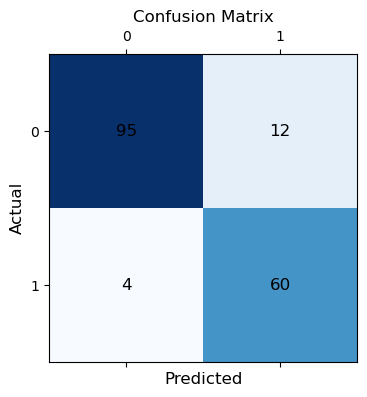

In [85]:
graph_confusion_matrix(tree_cmatrix)

In [86]:
#create classifier and predict for test set
rf_model=create_classifier('random forest')
rf_model=build_model(rf_model, X_train, y_train)
rfc_prediction=predict(rf_model,X_test)

In [87]:
rfc_prediction[:10]

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0])

In [88]:
#Check performance
print(classification_report(y_test,rfc_prediction))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       107
           1       0.90      0.95      0.92        64

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



In [89]:
rf_cmatrix=confusion_matrix(y_test,rfc_prediction)
#print(rf_cmatrix)
rf_cmatrix.shape

(2, 2)

In [90]:
rf_cmatrix.shape[0],rf_cmatrix.shape[1]


(2, 2)

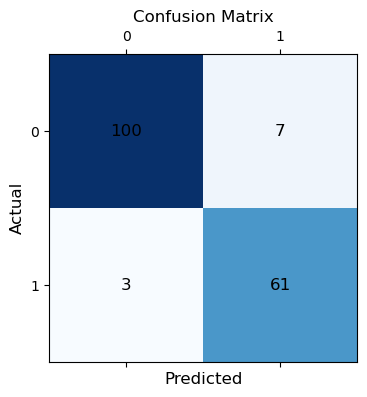

In [91]:
graph_confusion_matrix(rf_cmatrix)

In [92]:
#Build 5 nearest neigbor model
k5nn_model=create_classifier('k5nn')
k5nn_model=build_model(k5nn_model, X_train, y_train)
k5nn_prediction=predict(k5nn_model,X_test)

In [93]:
print(classification_report(y_test,k5nn_prediction))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       107
           1       0.91      0.94      0.92        64

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



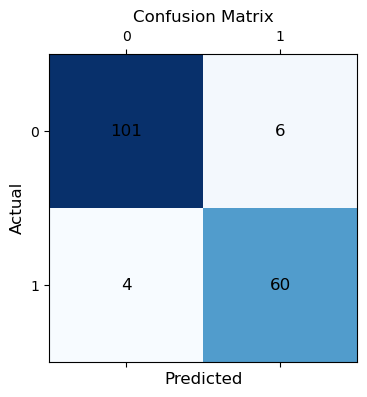

In [94]:
k5nn_cmatrix=confusion_matrix(y_test,k5nn_prediction)

graph_confusion_matrix(k5nn_cmatrix)

In [95]:
#Build 3 nearest neigbor model
k3nn_model=create_classifier('k3nn')
k3nn_model=build_model(k3nn_model, X_train, y_train)
k3nn_prediction=predict(k3nn_model,X_test)

In [96]:

print(classification_report(y_test,k3nn_prediction))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       107
           1       0.90      0.94      0.92        64

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



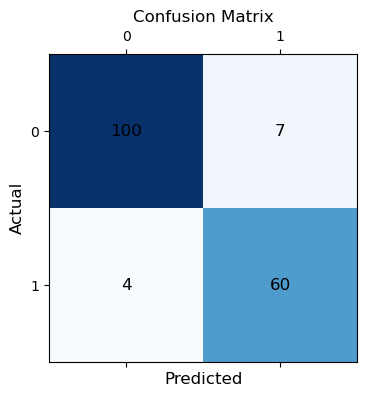

In [97]:
k3nn_cmatrix=confusion_matrix(y_test,k3nn_prediction)

graph_confusion_matrix(k3nn_cmatrix)

In [98]:
#Predict new instance
bcdata.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [99]:
X_unseen=[[13,21.82,87.5,519.8,0.1273,0.1932,0.1859,0.09353,0.235,0.07389,0.3063,1.002,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.2,739.3,0.1703,0.5401,0.539,0.206,0.4378,0.1072]]

In [100]:
X_unseen=scaler.transform(X_unseen)
X_unseen

array([[-3.13854716e-01,  5.55601021e-01, -1.78303988e-01,
        -3.77333112e-01,  2.21206412e+00,  1.67145134e+00,
         1.17442671e+00,  1.11357774e+00,  1.98820809e+00,
         1.63808264e+00, -3.41540435e-01, -3.93721690e-01,
        -2.21078735e-01, -3.34409701e-01, -4.09890975e-01,
         6.06608205e-01,  1.62351829e-01,  1.17517773e-01,
         1.34001277e-01, -2.01760198e-04, -1.55693413e-01,
         8.00692724e-01, -2.65068625e-02, -2.43819461e-01,
         1.69720555e+00,  1.81921329e+00,  1.24249158e+00,
         1.38243433e+00,  2.43323944e+00,  1.27820710e+00]])

In [101]:
y_unseen_by_tree=dt_model.predict(X_unseen)
y_unseen_by_rf=rf_model.predict(X_unseen)
y_unseen_by_k3nn=k3nn_model.predict(X_unseen)
y_unseen_by_k5nn=k5nn_model.predict(X_unseen)
y_unseen_by_tree,y_unseen_by_rf,y_unseen_by_k3nn,y_unseen_by_k5nn

(array([1]), array([1]), array([1]), array([1]))

In [104]:
#Build naive bayes model
nb_model=create_classifier('naive bayes')
nb_model=build_model(nb_model, X_train, y_train)
nb_prediction=predict(nb_model,X_test)

In [105]:
print(confusion_matrix(y_test,nb_prediction))
print(classification_report(y_test,nb_prediction))

[[96 11]
 [ 7 57]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       107
           1       0.84      0.89      0.86        64

    accuracy                           0.89       171
   macro avg       0.89      0.89      0.89       171
weighted avg       0.90      0.89      0.90       171



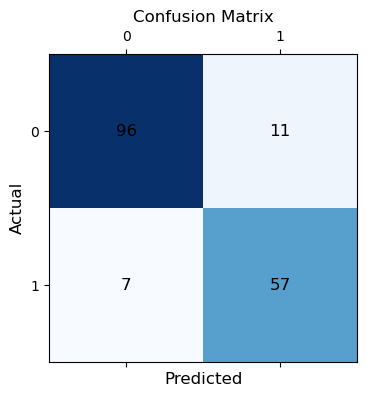

In [106]:
nb_cmatrix=confusion_matrix(y_test,nb_prediction)

graph_confusion_matrix(nb_cmatrix)

In [107]:
#Consider an unseen example with missing values

In [108]:
X_unseen2=[[13,21.82,87.5,519.8,0.1273,0.1932,0.1859,0.09353,0.235,0.07389,0.3063,1.002,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.2,739.3,0.1703,np.nan,0.539,np.nan,0.4378,0.1072]]

In [109]:
X_unseen2=scaler.transform(X_unseen2)
X_unseen2

array([[-3.13854716e-01,  5.55601021e-01, -1.78303988e-01,
        -3.77333112e-01,  2.21206412e+00,  1.67145134e+00,
         1.17442671e+00,  1.11357774e+00,  1.98820809e+00,
         1.63808264e+00, -3.41540435e-01, -3.93721690e-01,
        -2.21078735e-01, -3.34409701e-01, -4.09890975e-01,
         6.06608205e-01,  1.62351829e-01,  1.17517773e-01,
         1.34001277e-01, -2.01760198e-04, -1.55693413e-01,
         8.00692724e-01, -2.65068625e-02, -2.43819461e-01,
         1.69720555e+00,             nan,  1.24249158e+00,
                    nan,  2.43323944e+00,  1.27820710e+00]])

In [110]:
#What happens if you try to predict an instance with missing values?
#What does that tell you about handling missing values?

#y_unseen2_by_tree=predict(dt_model,X_unseen2)
#y_unseen2_by_rf=predict(rf_model,X_unseen2)
#y_unseen2_by_k3nn=predict(k3nn_model,X_unseen2)
#y_unseen2_by_k5nn=predict(k5nn_model,X_unseen2)
#y_unseen2_by_tree,y_unseen2_by_rf,y_unseen2_by_k3nn,y_unseen2_by_k5nn


In [111]:
treeAccuracy=accuracy_score(y_test, dt_prediction)
rfAccuracy=accuracy_score(y_test, rfc_prediction)
k3nnAccuracy=accuracy_score(y_test, k3nn_prediction)
k5nnAccuracy=accuracy_score(y_test, k5nn_prediction)
nbAccuracy=accuracy_score(y_test, nb_prediction)
accuracies={'Decision Tree':treeAccuracy,'Random Forest':rfAccuracy,
            'k=3 NN':k3nnAccuracy,'k=5 NN':k3nnAccuracy,'naive Bayes':nbAccuracy}

accuracies

{'Decision Tree': 0.9064327485380117,
 'Random Forest': 0.9415204678362573,
 'k=3 NN': 0.935672514619883,
 'k=5 NN': 0.935672514619883,
 'naive Bayes': 0.8947368421052632}

In [112]:
srAccuracies=pd.Series(accuracies)

In [113]:
srAccuracies

Decision Tree    0.906433
Random Forest    0.941520
k=3 NN           0.935673
k=5 NN           0.935673
naive Bayes      0.894737
dtype: float64

In [114]:
models=list(accuracies.keys())
modelAccuracies=list(accuracies.values())

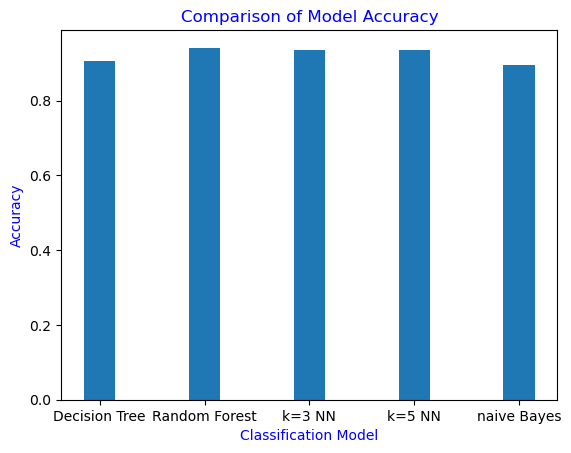

In [115]:
# Plot the graph
plt.bar(models, modelAccuracies, width = 0.3)
#Set up other properties e.g. label and title
plt.xlabel("Classification Model", color='blue')
plt.ylabel("Accuracy", color='blue')
plt.title("Comparison of Model Accuracy", color='blue')
plt.show()

<Axes: >

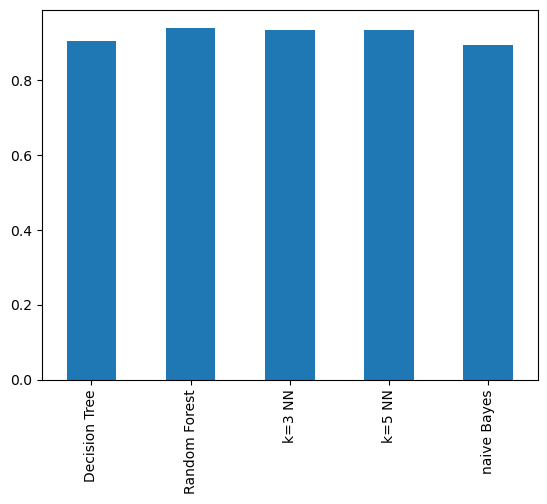

In [116]:
#Another way to plot - from a series
srAccuracies.plot(kind='bar')

In [117]:
#Another way to plot-from data frame
dfAccuracies=pd.DataFrame(data=accuracies, index=['accuracy'])

In [118]:
dfAccuracies

,Decision Tree,Random Forest,k=3 NN,k=5 NN,naive Bayes
accuracy,0.906433,0.94152,0.935673,0.935673,0.894737


<Axes: >

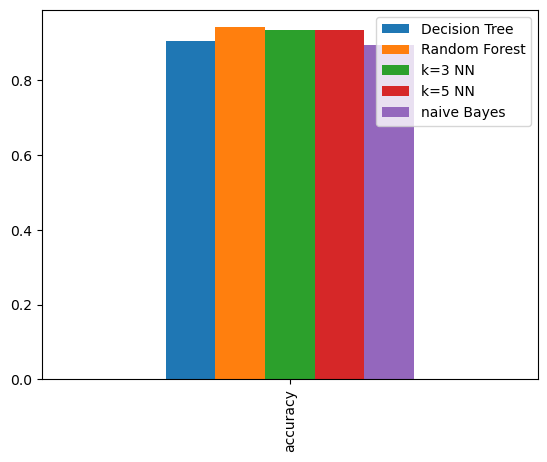

In [119]:
dfAccuracies.plot(kind='bar')

In [120]:
c_report=classification_report(y_test,nb_prediction,output_dict=True)
print(c_report)

{'0': {'precision': 0.9320388349514563, 'recall': 0.897196261682243, 'f1-score': 0.9142857142857143, 'support': 107.0}, '1': {'precision': 0.8382352941176471, 'recall': 0.890625, 'f1-score': 0.8636363636363636, 'support': 64.0}, 'accuracy': 0.8947368421052632, 'macro avg': {'precision': 0.8851370645345518, 'recall': 0.8939106308411215, 'f1-score': 0.888961038961039, 'support': 171.0}, 'weighted avg': {'precision': 0.8969310769785687, 'recall': 0.8947368421052632, 'f1-score': 0.8953292321713374, 'support': 171.0}}


In [121]:
type(c_report)

dict

In [122]:
precision=c_report['weighted avg']['precision']
recall=c_report['weighted avg']['recall']
f1_score=c_report['weighted avg']['f1-score']
accuracy=c_report['accuracy']
print(f"Precision:{precision:.3f}\nRecall:{recall:.3f}\
\nf1-score:{f1_score:.3f}\nAccuracy:{accuracy:.3f}")

Precision:0.897
Recall:0.895
f1-score:0.895
Accuracy:0.895


# Save and Load Models

In [123]:
import pickle 

<h3>a) Saving and loading a knn model</h3>

In [124]:
# save the model
filename = 'saved-models/k3nn_model.sav'
pickle.dump(k3nn_model, open(filename, 'wb'))

FileNotFoundError: [Errno 2] No such file or directory: 'saved-models/k3nn_model.sav'

In [125]:
# load the knn model 
k3nn_model = pickle.load(open(filename, 'rb'))

y2_unseen_by_k3nn=k3nn_model.predict(X_unseen)
print(y2_unseen_by_k3nn)

FileNotFoundError: [Errno 2] No such file or directory: 'saved-models/k3nn_model.sav'

<h3>b) Saving and loading a Random Forest model</h3>

In [ ]:
#Serialize a trained random forest model to disk
pickle.dump(rf_model,open('saved-models/rf_model.sav', 'wb'))

In [ ]:
#Load the Random Forest model from disk
loaded_rf_model = pickle.load(open('saved-models/rf_model.sav', 'rb'))
loaded_rf_model

In [ ]:
X_unseen

In [ ]:
#Predic unseen instance with the model we just loaded from pickle
y3_unseen_by_rf=loaded_rf_model.predict(X_unseen)

In [ ]:
#Print out the prediction.
y3_unseen_by_rf

In [ ]:
#Formulate the test set--for now, let's pick 8 samples, randomly.
X2_unseens=np.array([bcdata.iloc[30,1:],bcdata.iloc[90,1:],
                          bcdata.iloc[310,1:],bcdata.iloc[411,1:],
                          bcdata.iloc[511,1:],bcdata.iloc[378,1:],
                          bcdata.iloc[12,1:],bcdata.iloc[66,1:]])

In [ ]:
X2_unseens.shape

In [ ]:
X2_unseens=scaler.transform(X2_unseens)

In [ ]:
#Obtain the correct class---1st column of breast cancer dataset
correct_classes=np.array([bcdata.iloc[30,0],bcdata.iloc[90,0],
                          bcdata.iloc[310,0],bcdata.iloc[411,0],
                          bcdata.iloc[511,0],bcdata.iloc[378,0],
                          bcdata.iloc[12,0],bcdata.iloc[66,0]])

In [ ]:
correct_classes

In [ ]:
predicted_classes=loaded_rf_model.predict(X2_unseens)
predicted_classes

In [ ]:
X2_unseens[0]

In [ ]:
#Create dataframe for results
results_df=pd.DataFrame()
#Create columns for actual and predicted results
results_df['actual']=correct_classes

results_df['predicted']=predicted_classes
 
#Compare the two columns and create a new column that is True
#if the columns have equal values, and False, otherwise.
results_df['correct'] = np.where(
    results_df['actual'] == results_df['predicted'], True,False) 

In [ ]:
#Display the results dataframe
results_df

In [ ]:
diagnosis_label.classes_

In [ ]:
results_df['actual'] = np.where(
    results_df['actual'] == 1, 'M','B') 

In [ ]:
results_df['predicted'] = np.where(
    results_df['predicted'] == 1, 'M','B')

In [ ]:
results_df

In [ ]:
scaler.mean_

In [ ]:
scaler.var_

In [ ]:
scaler.scale_ #aka stddev---for each column

In [ ]:
scaler.n_features_in_ #number of features seen at scaling

In [ ]:
scaler.n_samples_seen_